In [11]:
import networkx as nx
import numpy as np
import itertools

## State representation

### Naive

In [21]:
colors = ['R', 'O', 'G', 'Y', 'B', 'W']
posible_color_pairs = [
    ('R', 'O'),
    ('R', 'G'),
    ('R', 'Y'),
    ('R', 'W'),
    ('O', 'G'),
    ('O', 'Y'),
    ('O', 'B'),
    ('G', 'B'),
    ('G', 'W'),
    ('Y', 'B'),
    ('Y', 'W'),
    ('B', 'W'),
]
nodes = [f'{c}{s}' for c in colors for s in range(9)]

edges = []

# edges inside side groups
for c in colors:
    for n in [(0,1,2), (3,4,5), (6,7,8), (0,3,6), (1,4,7), (2,5,8)]:
        edges = edges + [(f'{c}{n[0]}', f'{c}{n[1]}'), (f'{c}{n[1]}', f'{c}{n[2]}'),]

# horisontal relations
for i in [('R','W'), ('W','Y'), ('Y','B'), ('B','R')]:
    edges.append((f'{i[0]}2', f'{i[1]}0'))
    edges.append((f'{i[0]}5', f'{i[1]}3'))
    edges.append((f'{i[0]}8', f'{i[1]}6'))

# vertical relations
for i in [('G','W'), ('W','O')]:
    edges.append((f'{i[0]}6', f'{i[1]}0'))
    edges.append((f'{i[0]}7', f'{i[1]}1'))
    edges.append((f'{i[0]}8', f'{i[1]}2'))

edges.append(('O6', 'B8'))
edges.append(('O7', 'B7'))
edges.append(('O8', 'B6'))

edges.append(('B2', 'G0'))
edges.append(('B1', 'G1'))
edges.append(('B0', 'G2'))

# diagonal relations

edges.append(('R0', 'G0'))
edges.append(('R1', 'G3'))
edges.append(('R2', 'G6'))

edges.append(('G2', 'Y2'))
edges.append(('G5', 'Y1'))
edges.append(('G8', 'Y0'))

edges.append(('Y8', 'O8'))
edges.append(('Y7', 'O5'))
edges.append(('Y6', 'O2'))

edges.append(('O6', 'R6'))
edges.append(('O3', 'R7'))
edges.append(('O0', 'R8'))

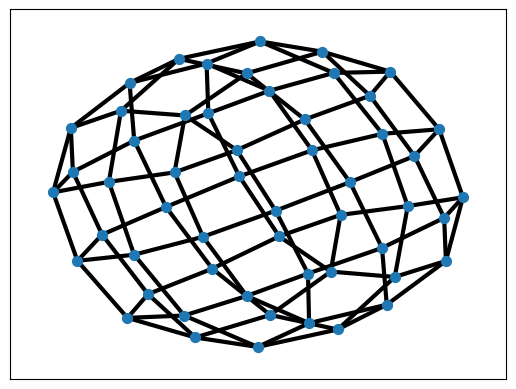

In [22]:
full = nx.Graph()
full.add_nodes_from(nodes)
full.add_edges_from(edges)
nx.draw_networkx(full, node_size=50, width=3.0, with_labels=False)

### Low

## Actions representation